# **Data Presentation**
First, lets explore the dataset a bit so we can see how the ingredients are distributed across the cuisines, the most popular ingredients in the dataset and by cuisine and other more obvious characteristics of the dataset.


### Load dataset

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
rcParams['figure.figsize'] = 11,8
#%matplotlib inline
sb.set_style('whitegrid')
#plt.style.use('dark_background')

df_original = pd.read_json('dataset/train.json')
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [2]:
df_original.head()
df_original.shape

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


(39774, 3)

### Number of recipes per cuisine


Text(0.5, 0, 'Ingredient')

Text(0, 0.5, 'Number of recipes')

Text(0.5, 1.0, 'Number of recipes per cuisine')

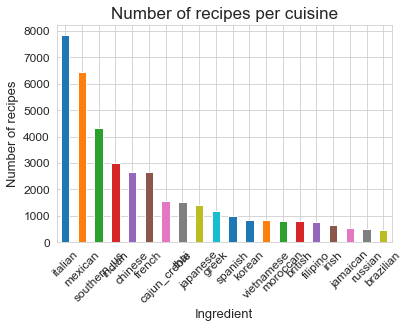

In [3]:
# Number of recipes per cuisine
number_recipe_cuisine = df_original['cuisine'].value_counts()

# Plots graph
ax = number_recipe_cuisine.plot(kind='bar', rot=45, fontsize=12)
ax.set_xlabel('Ingredient', fontsize=13)
ax.set_ylabel('Number of recipes', fontsize=13)
ax.set_title('Number of recipes per cuisine', fontsize=17)

### Histogram of recipe size

Text(0.5, 0, 'Recipe size')

Text(0, 0.5, 'Occurrences')

Text(0.5, 1.0, 'Histogram of recipe size')

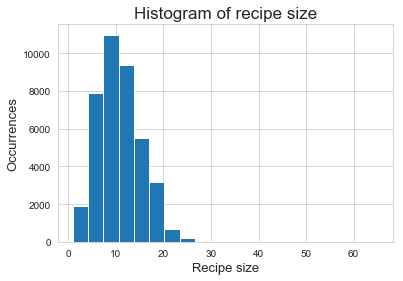

In [4]:
# Distribution of number of ingredients per recipe
size_recipe = df_original['ingredients'].apply(len)

# Plots graph
ax = size_recipe.hist(bins=20)
ax.set_xlabel('Recipe size', fontsize=13)
ax.set_ylabel('Occurrences', fontsize=13)
ax.set_title('Histogram of recipe size', fontsize=17)

### Most occurring ingredients in all recipes

Text(0.5,0,'Occurrences')

Text(0,0.5,'Ingredients')

Text(0.5,1,'Most common ingredients')

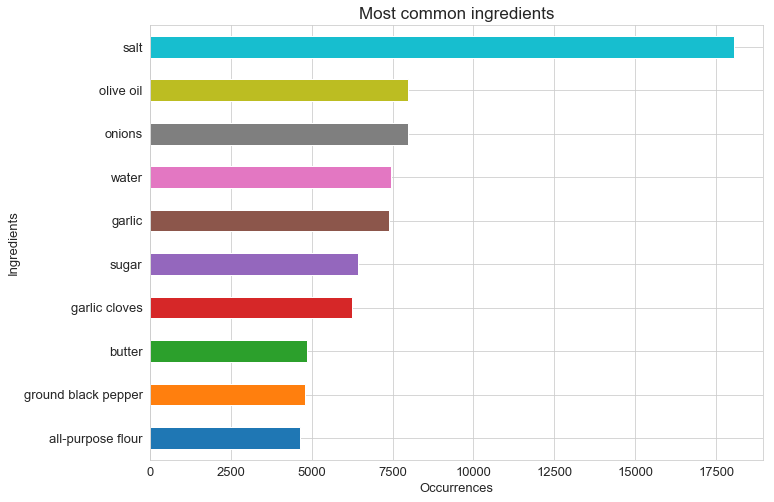

In [130]:
# Top 10 most occurring ingredients
from Methods import get_ingredients

all_ingredients = get_ingredients(df_original["ingredients"])
ax = all_ingredients.value_counts()[:10].sort_values(ascending=True).plot(kind='barh', fontsize=13)
ax.set_xlabel('Occurrences', fontsize=13)
ax.set_ylabel('Ingredients', fontsize=13)
ax.set_title('Most common ingredients', fontsize=17)
plt.savefig('common_ingredients')

### Groups ingredients by cuisine

In [113]:
# Group all ingredients by cuisine
all_ingredients_cuisine = df_original.groupby('cuisine')['ingredients'].sum()

all_ingredients_cuisine

cuisine
brazilian       [ice cubes, club soda, white rum, lime, turbin...
british         [greek yogurt, lemon curd, confectioners sugar...
cajun_creole    [herbs, lemon juice, fresh tomatoes, paprika, ...
chinese         [low sodium soy sauce, fresh ginger, dry musta...
filipino        [eggs, pepper, salt, mayonaise, cooking oil, g...
french          [sugar, salt, fennel bulb, water, lemon olive ...
greek           [romaine lettuce, black olives, grape tomatoes...
indian          [water, vegetable oil, wheat, salt, black pepp...
irish           [cooking spray, salt, black pepper, yukon gold...
italian         [sugar, pistachio nuts, white almond bark, flo...
jamaican        [plain flour, sugar, butter, eggs, fresh ginge...
japanese        [sirloin, mirin, yellow onion, low sodium soy ...
korean          [jasmine rice, garlic, scallions, sugar, shiit...
mexican         [olive oil, purple onion, fresh pineapple, por...
moroccan        [ground cloves, whole nutmegs, ground ginger, ...
ru

### Count the number of times each ingredient appears in each cuisine

In [114]:
def count_occ(group):
    return dict(Series(group).value_counts())

ingredient_count_by_cuisine = all_ingredients_cuisine.apply(count_occ)

ingredient_count_by_cuisine

cuisine
brazilian       {'salt': 194, 'onions': 133, 'olive oil': 118,...
british         {'salt': 407, 'all-purpose flour': 238, 'butte...
cajun_creole    {'salt': 743, 'onions': 529, 'garlic': 370, 'g...
chinese         {'soy sauce': 1363, 'sesame oil': 915, 'salt':...
filipino        {'salt': 421, 'garlic': 325, 'onions': 310, 'w...
french          {'salt': 1203, 'sugar': 637, 'all-purpose flou...
greek           {'salt': 572, 'olive oil': 504, 'dried oregano...
indian          {'salt': 1934, 'onions': 1195, 'garam masala':...
irish           {'salt': 376, 'all-purpose flour': 219, 'butte...
italian         {'salt': 3454, 'olive oil': 3111, 'garlic clov...
jamaican        {'salt': 332, 'onions': 173, 'water': 153, 'ga...
japanese        {'soy sauce': 561, 'salt': 422, 'mirin': 402, ...
korean          {'soy sauce': 427, 'sesame oil': 403, 'garlic'...
mexican         {'salt': 2720, 'onions': 1493, 'ground cumin':...
moroccan        {'salt': 413, 'olive oil': 412, 'ground cumin'...
ru

### Unique ingredients by cuisine

In [115]:
# Get unique ingredients by cuisine
def remove_duplicates(value):
    return list(set(value))

unique_ingredients_cuisine = all_ingredients_cuisine.apply(remove_duplicates)

unique_ingredients_cuisine


cuisine
brazilian       [chopped cilantro fresh, biscuits, pig, white ...
british         [topside steak, honey mustard, low-fat vanilla...
cajun_creole    [chopped cilantro fresh, crushed pineapple, hu...
chinese         [chopped cilantro fresh, plum jam, greens, egg...
filipino        [crushed pineapple, pig, greens, nonstick spra...
french          [chopped cilantro fresh, hungarian paprika, gr...
greek           [chopped cilantro fresh, dried mint flakes, hu...
indian          [chopped cilantro fresh, crushed pineapple, hu...
irish           [chopped cilantro fresh, dried mint flakes, gr...
italian         [chopped cilantro fresh, crushed pineapple, hu...
jamaican        [chopped cilantro fresh, crushed pineapple, pi...
japanese        [chopped cilantro fresh, golden delicious appl...
korean          [chopped cilantro fresh, shredded nori, greens...
mexican         [chopped cilantro fresh, crushed pineapple, di...
moroccan        [chopped cilantro fresh, dried mint flakes, hu...
ru

### Number of unique ingredients used by cuisine

Text(0.5,0,'Cuisine')

Text(0,0.5,'Number of unique Ingredients')

Text(0.5,1,'Unique ingredients by cuisine')

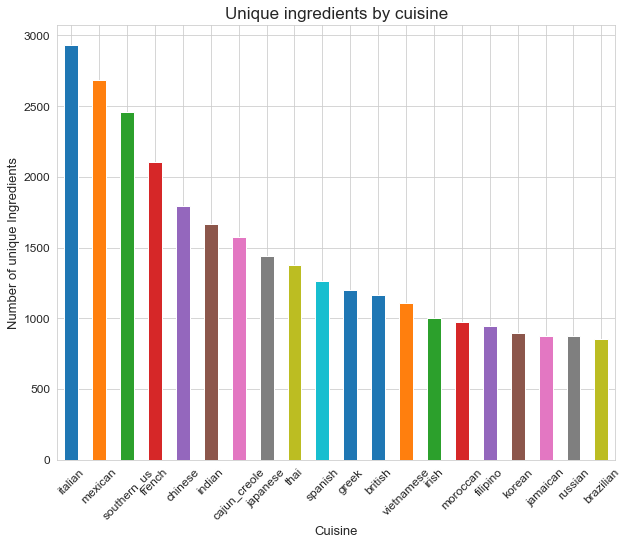

In [116]:
to_plot = unique_ingredients_cuisine.apply(len).sort_values(ascending=False)
ax = to_plot.plot(kind='bar', rot=45, fontsize=12)
ax.set_xlabel('Cuisine', fontsize=13)
ax.set_ylabel('Number of unique Ingredients', fontsize=13)
ax.set_title('Unique ingredients by cuisine', fontsize=17)

### Unique ingredients in the dataset

In [117]:
unique_ingredients = Series(get_ingredients(unique_ingredients_cuisine).unique())
print('There are', str(len(unique_ingredients)), 'unique ingredients')

There are 6714 unique ingredients


### Top 10 ingredients per cuisine

In [118]:
top10 = Series()

for cuisine, list_ingredients in ingredient_count_by_cuisine.items():
    top10.loc[cuisine] = []
    for ingredient, occurrence in Series(list_ingredients)[:10].items():
        top10.loc[cuisine].append(ingredient)


df_top10 = DataFrame.from_items(zip(top10.index, top10.values)).T
df_top10.columns = ['top{}'.format(i) for i in range(1, 11)]
df_top10

C:\Users\Rafael\Anaconda3\envs\data3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
brazilian,salt,onions,olive oil,lime,water,garlic cloves,garlic,cachaca,sugar,tomatoes
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs
cajun_creole,salt,onions,garlic,green bell pepper,butter,olive oil,cayenne pepper,cajun seasoning,all-purpose flour,water
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
filipino,salt,garlic,onions,water,soy sauce,pepper,oil,sugar,carrots,ground black pepper
french,salt,sugar,all-purpose flour,unsalted butter,olive oil,butter,water,large eggs,garlic cloves,ground black pepper
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
irish,salt,all-purpose flour,butter,onions,potatoes,sugar,baking soda,baking powder,milk,carrots
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
